<a href="https://colab.research.google.com/github/Nahla-yasmine/Arabic-News-Scraper/blob/main/(BBC_News_)Web_Scraping_NEWS_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (BBC News )Web Scraping NEWS Articles

In [36]:
!pip install requests beautifulsoup4 pandas

In [37]:
!pip install selenium

## Economic news (first page)

In [39]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920,1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

def scrape_bbc_arabic():
    driver = web_driver()
    url = 'https://www.bbc.com/arabic/topics/cqywj97d487t'
    driver.get(url)
    time.sleep(5)  # Wait for the page to load

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    articles = soup.find_all('h2', class_='bbc-ghpu9f e47bds20')

    data = []
    for article in articles:
        title = article.text.strip()
        link = article.find('a')['href']
        driver.get(link)  # Visit the article page to extract text
        time.sleep(2)  # Wait for the article page to load
        article_soup = BeautifulSoup(driver.page_source, 'html.parser')
        date_element = article_soup.find('time', class_='bbc-1eu2r82 e1mklfmt0')
        date = date_element.text.strip() if date_element else 'Date not found'
        text_paragraphs = article_soup.find_all('p', class_='bbc-1gjryo4 e17g058b0')
        text = ' '.join([p.text.strip() for p in text_paragraphs])
        data.append({'Title': title, 'Link': link, 'Date': date, 'Text': text})

    driver.quit()
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    df = scrape_bbc_arabic()


In [40]:
df

,Title,Link,Date,Text
0,"فيديو, باندا و""الورواري"".. بائعا فواكه يحرجان ...",https://www.bbc.com/arabic/articles/cmm3779yqq4o,Date not found,
1,ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...,https://www.bbc.com/arabic/articles/cv2rlg7vzm2o,قبل 7 ساعة,** تحذير: يحتوي المقال على قصص وحقائق قد يجدها...
2,ماذا نعرف عن المليارديرة الفيتنامية التي حكم ع...,https://www.bbc.com/arabic/articles/c0v01zxw0vlo,12 أبريل/ نيسان 2024، 09:20 GMT,تعد محاكمة خضعت لها مليارديرة فيتنامية، الأكثر...
3,هل سيصبح 75 عاما سن التقاعد، وهل بات ذلك مستحي...,https://www.bbc.com/arabic/articles/c4nrg84r2m3o,10 أبريل/ نيسان 2024,بات الناس يعيشون عمرا أطول، والحياة أصبحت تزدا...
4,ماكدونالدز تسترد ملكية فروع مطاعمها في إسرائيل,https://www.bbc.com/arabic/articles/c517n8dy71po,5 أبريل/ نيسان 2024,تعتزم شركة ماكدونالدز العملاقة للوجبات السريعة...
5,خمسة أسئلة حول ما يحدث للاقتصاد الصيني,https://www.bbc.com/arabic/articles/c4nlyn53yzqo,1 أبريل/ نيسان 2024,يان تشن بي بي سي الصينية منذ أن بدأت الصين في ...
6,كيف تُصدّر أوكرانيا حبوبها وما حجمها الآن؟,https://www.bbc.com/arabic/articles/cjmxgr0djewo,30 مارس/ آذار 2024,تصدّر أوكرانيا الآن نحو خمسة ملايين طن من الحب...
7,شركة يابانية توقف إنتاج حفاضات الأطفال لتوفيره...,https://www.bbc.com/arabic/articles/cyxz1995vd2o,27 مارس/ آذار 2024,أعلنت شركة يابانية لصناعة الحفاضات أنها ستتوقف...
8,"فيديو, كيف انهار جسر بالتيمور بعد أن اصطدمت به...",https://www.bbc.com/arabic/articles/cll5dd6lvz4o,Date not found,
9,"فيديو, شاهد لحظة انهيار جسر بالتيمور في ولاية ...",https://www.bbc.com/arabic/articles/cp4lj5l10d8o,Date not found,


## Economic', 'Sport','Science and Technology' News

In [41]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920,1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

def scrape_bbc_arabic(categories, num_pages=3):
    driver = web_driver()
    data = []

    for category_url, category in categories.items():
        base_url = f'{category_url}?page='

        for page in range(1, num_pages + 1):
            url = base_url + str(page)
            driver.get(url)
            time.sleep(5)  # Wait for the page to load

            soup = BeautifulSoup(driver.page_source, 'html.parser')
            articles = soup.find_all('h2', class_='bbc-ghpu9f e47bds20')

            for article in articles:
                title = article.text.strip()
                link = article.find('a')['href']
                driver.get(link)  # Visit the article page to extract text
                time.sleep(2)  # Wait for the article page to load
                article_soup = BeautifulSoup(driver.page_source, 'html.parser')
                date_element = article_soup.find('time', class_='bbc-1eu2r82 e1mklfmt0')
                date = date_element.text.strip() if date_element else 'Date not found'
                text_paragraphs = article_soup.find_all('p', class_='bbc-1gjryo4 e17g058b0')
                text = ' '.join([p.text.strip() for p in text_paragraphs])
                data.append({'Category': category, 'Title': title, 'Link': link, 'Date': date, 'Text': text})

    driver.quit()
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    categories = {
        'https://www.bbc.com/arabic/topics/cqywj97d487t': 'Economic'

    }
    df_Economic = scrape_bbc_arabic(categories, num_pages=35)  # Change the number of pages as needed



In [42]:
df_Economic


,Category,Title,Link,Date,Text
0,Economic,"فيديو, باندا و""الورواري"".. بائعا فواكه يحرجان ...",https://www.bbc.com/arabic/articles/cmm3779yqq4o,Date not found,
1,Economic,ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...,https://www.bbc.com/arabic/articles/cv2rlg7vzm2o,قبل 7 ساعة,** تحذير: يحتوي المقال على قصص وحقائق قد يجدها...
2,Economic,ماذا نعرف عن المليارديرة الفيتنامية التي حكم ع...,https://www.bbc.com/arabic/articles/c0v01zxw0vlo,12 أبريل/ نيسان 2024، 09:20 GMT,تعد محاكمة خضعت لها مليارديرة فيتنامية، الأكثر...
3,Economic,هل سيصبح 75 عاما سن التقاعد، وهل بات ذلك مستحي...,https://www.bbc.com/arabic/articles/c4nrg84r2m3o,10 أبريل/ نيسان 2024,بات الناس يعيشون عمرا أطول، والحياة أصبحت تزدا...
4,Economic,ماكدونالدز تسترد ملكية فروع مطاعمها في إسرائيل,https://www.bbc.com/arabic/articles/c517n8dy71po,5 أبريل/ نيسان 2024,تعتزم شركة ماكدونالدز العملاقة للوجبات السريعة...
...,...,...,...,...,...
835,Economic,"فيديو, كيف سببت أمريكا ""انهيار"" العملة الإيران...",https://www.bbc.com/arabic/media-53369124,10 يوليو/ تموز 2020,يواصل الريال الإيراني هبوطه التاريخي في مقابل ...
836,Economic,"فيديو, عرائس من إيطاليا يتظاهرن من أجل حفلات ا...",https://www.bbc.com/arabic/tv-and-radio-53366567,10 يوليو/ تموز 2020,عدد من العرائس في إيطاليا يتظاهرن ضد عدم السما...
837,Economic,"فيديو, ""مضطرون للهجرة إذا أردنا تربية أولادنا""...",https://www.bbc.com/arabic/media-53352252,9 يوليو/ تموز 2020,في ظل الأزمة الاقتصادية الهائلة التي يمر بها ل...
838,Economic,أوكسفام تنذر بمجاعة عالمية تشمل ثلاث دول عربية,https://www.bbc.com/arabic/world-53348559,9 يوليو/ تموز 2020,حذرت منظمة أوكسفام الخيرية من أن وباء كوفيد-19...


In [43]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920,1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

def scrape_bbc_arabic(categories, num_pages=3):
    driver = web_driver()
    data = []

    for category_url, category in categories.items():
        base_url = f'{category_url}?page='

        for page in range(1, num_pages + 1):
            url = base_url + str(page)
            driver.get(url)
            time.sleep(5)  # Wait for the page to load

            soup = BeautifulSoup(driver.page_source, 'html.parser')
            articles = soup.find_all('h2', class_='bbc-ghpu9f e47bds20')

            for article in articles:
                title = article.text.strip()
                link = article.find('a')['href']
                driver.get(link)  # Visit the article page to extract text
                time.sleep(2)  # Wait for the article page to load
                article_soup = BeautifulSoup(driver.page_source, 'html.parser')
                date_element = article_soup.find('time', class_='bbc-1eu2r82 e1mklfmt0')
                date = date_element.text.strip() if date_element else 'Date not found'
                text_paragraphs = article_soup.find_all('p', class_='bbc-1gjryo4 e17g058b0')
                text = ' '.join([p.text.strip() for p in text_paragraphs])
                data.append({'Category': category, 'Title': title, 'Link': link, 'Date': date, 'Text': text})

    driver.quit()
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    categories = {
       'https://www.bbc.com/arabic/topics/cyx5kw7g1j2t': 'Sport'
        }
    df_Sport = scrape_bbc_arabic(categories, num_pages=35)  # Change the number of pages as needed

In [44]:
df_Sport

,Category,Title,Link,Date,Text
0,Sport,"فيديو, مشجع سعودي يضرب لاعبا مغربيا بالسوطالمد...",https://www.bbc.com/arabic/articles/cpdgzzyvrljo,Date not found,
1,Sport,"فيديو, دوري أبطال أوروبا: قمة الإثارة في مواج...",https://www.bbc.com/arabic/articles/cge8y4lyxn5o,Date not found,
2,Sport,رونالدو يثير الجدل مجدداً في السعودية بعد ضربه...,https://www.bbc.com/arabic/articles/cp6gn24k5nro,10 أبريل/ نيسان 2024,أثار قائد نادي النصر السعودي النجم البرتغالي ك...
3,Sport,دوري أبطال أوروبا: الريال يتعادل مع السيتي في ...,https://www.bbc.com/arabic/articles/ck7l2zyyrwyo,9 أبريل/ نيسان 2024,حسم التعادل قمة ريال مدريد الإسباني و ضيفه مان...
4,Sport,"فيديو, النصر والهلال.. طرد رونالدو لضربه البلي...",https://www.bbc.com/arabic/articles/c3g8kzzdem9o,Date not found,
...,...,...,...,...,...
834,Sport,انتقاد لليويفا بسبب الأماكن المخصصة لمستخدمي ا...,https://www.bbc.com/arabic/sports-61596363,26 مايو/ أيار 2022,قالت رابطة مشجعي نادي ليفربول من ذوي الإعاقة إ...
835,Sport,كلوب: مباراة نهائي أبطال أوروبا أمام ريال مدري...,https://www.bbc.com/arabic/sports-61587344,25 مايو/ أيار 2022,يرى مدرب فريق ليفربول الإنجليزي، يورغن كلوب، أ...
836,Sport,إصابات وأعمال شغب وترحيل مشجعين بعد اشتباكات ب...,https://www.bbc.com/arabic/sports-61577739,25 مايو/ أيار 2022,أصيب 19 ضابط شرطة أثناء فض الاشتباكات بين مشجع...
837,Sport,الحكومة البريطانية توافق على بيع نادي تشيلسي,https://www.bbc.com/arabic/sports-61574231,24 مايو/ أيار 2022,وافقت الحكومة البريطانية على انتقال ملكية نادي...


In [45]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920,1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

def scrape_bbc_arabic(categories, num_pages=3):
    driver = web_driver()
    data = []

    for category_url, category in categories.items():
        base_url = f'{category_url}?page='

        for page in range(1, num_pages + 1):
            url = base_url + str(page)
            driver.get(url)
            time.sleep(5)  # Wait for the page to load

            soup = BeautifulSoup(driver.page_source, 'html.parser')
            articles = soup.find_all('h2', class_='bbc-ghpu9f e47bds20')

            for article in articles:
                title = article.text.strip()
                link = article.find('a')['href']
                driver.get(link)  # Visit the article page to extract text
                time.sleep(2)  # Wait for the article page to load
                article_soup = BeautifulSoup(driver.page_source, 'html.parser')
                date_element = article_soup.find('time', class_='bbc-1eu2r82 e1mklfmt0')
                date = date_element.text.strip() if date_element else 'Date not found'
                text_paragraphs = article_soup.find_all('p', class_='bbc-1gjryo4 e17g058b0')
                text = ' '.join([p.text.strip() for p in text_paragraphs])
                data.append({'Category': category, 'Title': title, 'Link': link, 'Date': date, 'Text': text})

    driver.quit()
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    categories = {
                'https://www.bbc.com/arabic/topics/clmj3d7282gt': 'Science and Technology'
    }
    df_Science = scrape_bbc_arabic(categories, num_pages=35)  # Change the number of pages as needed

In [46]:
df_Science

,Category,Title,Link,Date,Text
0,Science and Technology,ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...,https://www.bbc.com/arabic/articles/cv2rlg7vzm2o,قبل 9 ساعة,** تحذير: يحتوي المقال على قصص وحقائق قد يجدها...
1,Science and Technology,"كيف تصل هذه ""الكيماويات الضارة"" إلى مياه الشرب؟",https://www.bbc.com/arabic/articles/c296pn0gl34o,11 أبريل/ نيسان 2024,إنها توجد في المياه التي نشربها، وفي أغلفة الأ...
2,Science and Technology,لماذا قد يكون من الصعب العثور على الحب في زمن ...,https://www.bbc.com/arabic/articles/ce7rdg8er0zo,11 أبريل/ نيسان 2024,يقول بول سي برونسون، الباحث الرئيسي في تطبيق T...
3,Science and Technology,"""هل يمكن اتهام حلفاء إسرائيل بارتكاب جرائم حرب...",https://www.bbc.com/arabic/articles/c80zrggz84eo,10 أبريل/ نيسان 2024,نبدأ جولتنا في عرض الصحف من مجلة التايم الأمري...
4,Science and Technology,هل صرنا معرّضين للإصابة بالسرطان في سنّ مبكرة؟...,https://www.bbc.com/arabic/articles/cy7zzd5rqqeo,10 أبريل/ نيسان 2024,شكل إعلان الأميرة كيت ميدلتون عن إصابتها بالسر...
...,...,...,...,...,...
835,Science and Technology,توفير اتصال لهواتف أندرويد عبر الأقمار الاصطنا...,https://www.bbc.com/arabic/science-and-tech-64...,6 يناير/ كانون الثاني 2023,ستوفر شراكة جديدة بين شركة هاتف الأقمار الاصطن...
836,Science and Technology,لماذا يتعمد بعض الشباب في الصين التعرض للإصابة...,https://www.bbc.com/arabic/world-64187460,6 يناير/ كانون الثاني 2023,عندما أصيب والد السيد تشين، البالغ من العمر 85...
837,Science and Technology,كيف تحول أغنى شخص بالعالم إلى أكثر إنسان يفقد ...,https://www.bbc.com/arabic/business-64173975,5 يناير/ كانون الثاني 2023,فقد إيلون ماسك الرئيس التنفيذي لتسلا 200 مليار...
838,Science and Technology,مطالبات بفرض اختبارات كورونا على القادمين من ا...,https://www.bbc.com/arabic/science-and-tech-64...,5 يناير/ كانون الثاني 2023,شدد مسؤولون في الاتحاد الأوروبي على أهمية فرض ...


In [47]:
import pandas as pd

# Assuming you have three dataframes named df_Science, df_Sport, and df_Economic

# Concatenate the dataframes along the rows
df_merged = pd.concat([df_Science, df_Sport, df_Economic], ignore_index=True)

# Optionally, you can reset the index of the merged dataframe
df_merged.reset_index(drop=True, inplace=True)

summary_stats = df_merged.describe()
print(summary_stats)



                      Category  \
count                     2519   
unique                       3   
top     Science and Technology   
freq                       840   

                                                    Title  \
count                                                2519   
unique                                               2473   
top     ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...   
freq                                                    2   

                                                    Link            Date  Text  
count                                               2519            2519  2519  
unique                                              2474             886  2390  
top     https://www.bbc.com/arabic/articles/cv2rlg7vzm2o  Date not found        
freq                                                   2              79    84  


In [48]:
df_merged


,Category,Title,Link,Date,Text
0,Science and Technology,ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...,https://www.bbc.com/arabic/articles/cv2rlg7vzm2o,قبل 9 ساعة,** تحذير: يحتوي المقال على قصص وحقائق قد يجدها...
1,Science and Technology,"كيف تصل هذه ""الكيماويات الضارة"" إلى مياه الشرب؟",https://www.bbc.com/arabic/articles/c296pn0gl34o,11 أبريل/ نيسان 2024,إنها توجد في المياه التي نشربها، وفي أغلفة الأ...
2,Science and Technology,لماذا قد يكون من الصعب العثور على الحب في زمن ...,https://www.bbc.com/arabic/articles/ce7rdg8er0zo,11 أبريل/ نيسان 2024,يقول بول سي برونسون، الباحث الرئيسي في تطبيق T...
3,Science and Technology,"""هل يمكن اتهام حلفاء إسرائيل بارتكاب جرائم حرب...",https://www.bbc.com/arabic/articles/c80zrggz84eo,10 أبريل/ نيسان 2024,نبدأ جولتنا في عرض الصحف من مجلة التايم الأمري...
4,Science and Technology,هل صرنا معرّضين للإصابة بالسرطان في سنّ مبكرة؟...,https://www.bbc.com/arabic/articles/cy7zzd5rqqeo,10 أبريل/ نيسان 2024,شكل إعلان الأميرة كيت ميدلتون عن إصابتها بالسر...
...,...,...,...,...,...
2514,Economic,"فيديو, كيف سببت أمريكا ""انهيار"" العملة الإيران...",https://www.bbc.com/arabic/media-53369124,10 يوليو/ تموز 2020,يواصل الريال الإيراني هبوطه التاريخي في مقابل ...
2515,Economic,"فيديو, عرائس من إيطاليا يتظاهرن من أجل حفلات ا...",https://www.bbc.com/arabic/tv-and-radio-53366567,10 يوليو/ تموز 2020,عدد من العرائس في إيطاليا يتظاهرن ضد عدم السما...
2516,Economic,"فيديو, ""مضطرون للهجرة إذا أردنا تربية أولادنا""...",https://www.bbc.com/arabic/media-53352252,9 يوليو/ تموز 2020,في ظل الأزمة الاقتصادية الهائلة التي يمر بها ل...
2517,Economic,أوكسفام تنذر بمجاعة عالمية تشمل ثلاث دول عربية,https://www.bbc.com/arabic/world-53348559,9 يوليو/ تموز 2020,حذرت منظمة أوكسفام الخيرية من أن وباء كوفيد-19...


**delete out rows where date is 'Date not found' and text is empty**

In [49]:
# Filter out rows where date is 'Date not found' and text is empty
df_merged = df_merged[(df_merged['Date'] != 'Date not found') & (df_merged['Text'] != '')]

# Reset the index after filtering
df_merged.reset_index(drop=True, inplace=True)



In [50]:
df_merged

,Category,Title,Link,Date,Text
0,Science and Technology,ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...,https://www.bbc.com/arabic/articles/cv2rlg7vzm2o,قبل 9 ساعة,** تحذير: يحتوي المقال على قصص وحقائق قد يجدها...
1,Science and Technology,"كيف تصل هذه ""الكيماويات الضارة"" إلى مياه الشرب؟",https://www.bbc.com/arabic/articles/c296pn0gl34o,11 أبريل/ نيسان 2024,إنها توجد في المياه التي نشربها، وفي أغلفة الأ...
2,Science and Technology,لماذا قد يكون من الصعب العثور على الحب في زمن ...,https://www.bbc.com/arabic/articles/ce7rdg8er0zo,11 أبريل/ نيسان 2024,يقول بول سي برونسون، الباحث الرئيسي في تطبيق T...
3,Science and Technology,"""هل يمكن اتهام حلفاء إسرائيل بارتكاب جرائم حرب...",https://www.bbc.com/arabic/articles/c80zrggz84eo,10 أبريل/ نيسان 2024,نبدأ جولتنا في عرض الصحف من مجلة التايم الأمري...
4,Science and Technology,هل صرنا معرّضين للإصابة بالسرطان في سنّ مبكرة؟...,https://www.bbc.com/arabic/articles/cy7zzd5rqqeo,10 أبريل/ نيسان 2024,شكل إعلان الأميرة كيت ميدلتون عن إصابتها بالسر...
...,...,...,...,...,...
2430,Economic,"فيديو, كيف سببت أمريكا ""انهيار"" العملة الإيران...",https://www.bbc.com/arabic/media-53369124,10 يوليو/ تموز 2020,يواصل الريال الإيراني هبوطه التاريخي في مقابل ...
2431,Economic,"فيديو, عرائس من إيطاليا يتظاهرن من أجل حفلات ا...",https://www.bbc.com/arabic/tv-and-radio-53366567,10 يوليو/ تموز 2020,عدد من العرائس في إيطاليا يتظاهرن ضد عدم السما...
2432,Economic,"فيديو, ""مضطرون للهجرة إذا أردنا تربية أولادنا""...",https://www.bbc.com/arabic/media-53352252,9 يوليو/ تموز 2020,في ظل الأزمة الاقتصادية الهائلة التي يمر بها ل...
2433,Economic,أوكسفام تنذر بمجاعة عالمية تشمل ثلاث دول عربية,https://www.bbc.com/arabic/world-53348559,9 يوليو/ تموز 2020,حذرت منظمة أوكسفام الخيرية من أن وباء كوفيد-19...


**Statistics**

In [51]:
summary_stats = df_merged.describe()
summary_stats


,Category,Title,Link,Date,Text
count,2435,2435,2435,2435,2435
unique,3,2389,2390,884,2389
top,Sport,ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...,https://www.bbc.com/arabic/articles/cv2rlg7vzm2o,19 يناير/ كانون الثاني 2023,** تحذير: يحتوي المقال على قصص وحقائق قد يجدها...
freq,819,2,2,17,2


In [52]:
# Remove duplicate rows based on the 'Title' column
df_merged_no_duplicates = df_merged.drop_duplicates(subset='Title')

# Reset index after removing duplicates
df_merged_no_duplicates.reset_index(drop=True, inplace=True)

# Print the shape of the dataframe to see how many duplicates were removed
print("Shape of dataframe after removing duplicates:", df_merged_no_duplicates.shape)


Shape of dataframe after removing duplicates: (2389, 5)


In [53]:
summary_stats = df_merged_no_duplicates.describe()
summary_stats

,Category,Title,Link,Date,Text
count,2389,2389,2389,2389,2389
unique,3,2389,2389,883,2388
top,Sport,ما أسباب ارتفاع معدل الانتحار بين الشباب الأمر...,https://www.bbc.com/arabic/articles/cv2rlg7vzm2o,19 يناير/ كانون الثاني 2023,يزور أنيس القديحي معهد علمي في مانشستر للتعرف ...
freq,809,1,1,15,2


In [54]:
df_merged=df_merged_no_duplicates

**Grouping and Aggregation**

In [55]:
category_counts = df_merged.groupby('Category').size()
print(category_counts)


Category
Economic                  780
Science and Technology    800
Sport                     809
dtype: int64


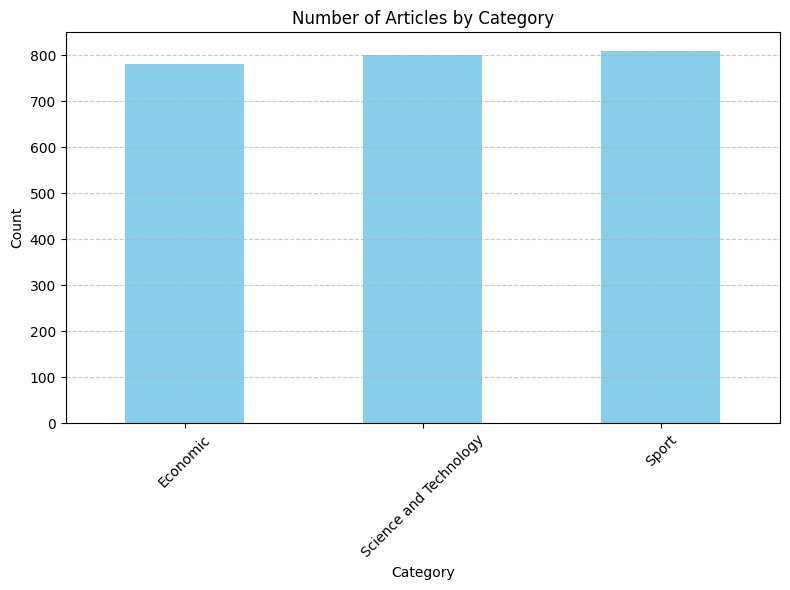

In [56]:
import matplotlib.pyplot as plt

# Group by category and count the number of articles in each category
category_counts = df_merged.groupby('Category').size()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


**Save the data**

In [57]:
# Save the merged dataframe to a CSV file
df_merged.to_csv('bbc_arabic_news.csv', index=False)

print("Data has been saved to bbc_arabic_news.csv")


Data has been saved to bbc_arabic_news.csv
